https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [123]:
## Final Project 

## - Packages:

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers


import sklearn
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [125]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [126]:
np.random.seed(1)

## - Upload data: 

In [127]:
#upload data from .csv file 
train_data=pd.read_csv("/Users/averydavis/Desktop/AI_2/Final/train.csv")
test_data=pd.read_csv("/Users/averydavis/Desktop/AI_2/Final/test.csv")

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [129]:
train_data.head()

id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...            80                 1   
1                        1  ...            80                 1   
2                        3  ...            80                 2   
3                        3  ...            80                 0   
4                        2  ...            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 10                      2               3              10   
1                  4                      3               3               4   
2                  4                      3               3               3   
3                 15                      1               1               6   
4                 31                      0               3              31   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  0                        7                     8          0  
1                  2                        0                     3          0  
2                  2                        1                     2          0  
3                  0                        0                     2          0  
4                 14                        4                    10          1  

[5 rows x 35 columns]

## - Data Visualization and exploration

In [130]:
train_data.describe()

id          Age    DailyRate  DistanceFromHome    Education  \
count  1677.000000  1677.000000  1677.000000       1677.000000  1677.000000   
mean    838.000000    36.036971   892.749553          8.683959     2.937984   
std     484.252517     8.507112   374.496259          7.826143     1.039078   
min       0.000000    18.000000   107.000000          1.000000     1.000000   
25%     419.000000    30.000000   589.000000          2.000000     2.000000   
50%     838.000000    35.000000   890.000000          7.000000     3.000000   
75%    1257.000000    41.000000  1223.000000         12.000000     4.000000   
max    1676.000000    60.000000  3921.000000         29.000000    15.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1677.0              1677.000000  1677.000000     1677.000000   
mean             1.0                 2.757901    67.798450        2.782349   
std              0.0                 1.086835    19.435928        0.650664   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    51.000000        2.000000   
50%              1.0                 3.000000    69.000000        3.000000   
75%              1.0                 4.000000    84.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  StandardHours  StockOptionLevel  TotalWorkingYears  \
count  1677.000000  ...         1677.0       1677.000000        1677.000000   
mean      1.998807  ...           80.0          0.721527          10.709600   
std       1.083065  ...            0.0          0.771259           7.255135   
min       1.000000  ...           80.0          0.000000           0.000000   
25%       1.000000  ...           80.0          0.000000           6.000000   
50%       2.000000  ...           80.0          1.000000           9.000000   
75%       2.000000  ...           80.0          1.000000          14.000000   
max       7.000000  ...           80.0          3.000000          41.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1677.000000      1677.000000     1677.000000   
mean                2.732856         2.769827        6.806798   
std                 1.145271         0.647721        5.883282   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       41.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
count         1677.000000              1677.000000           1677.000000   
mean             4.144305                 1.978533              4.186643   
std              3.583398                 3.045716              3.576189   
min              0.000000                 0.000000              0.000000   
25%              2.000000                 0.000000              2.000000   
50%              3.000000                 1.000000              3.000000   
75%              7.000000                 2.000000              7.000000   
max             18.000000                15.000000             17.000000   

         Attrition  
count  1677.000000  
mean      0.119261  
std       0.324192  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

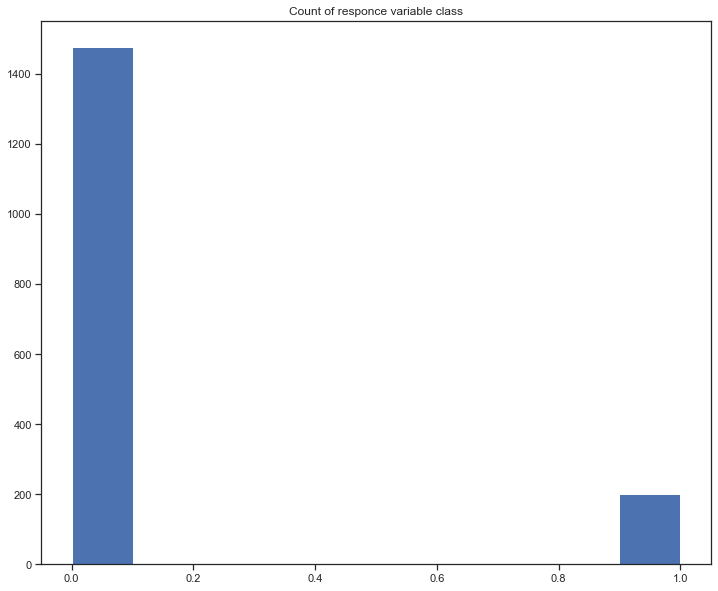

In [131]:
plt.hist(train_data["Attrition"])
plt.title("Count of responce variable class")
plt.show()

In [132]:
#show an actual count and % of the responce variable class
neg, pos = np.bincount(train_data['Attrition'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1677
    Positive: 200 (11.93% of total)



In [133]:
#num_inputs = {name:input for name,input in inputs.items()
                  #if input.dtype==tf.float32}

fig = plt.figure(figsize=(26,26), dpi = 480)
df = train_data
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.title("Correlation Heat map")
plt.show()

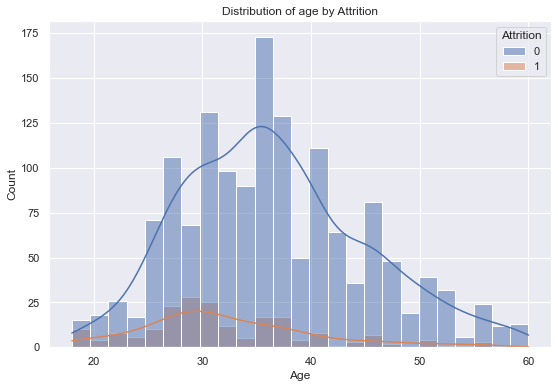

In [134]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "Age",
             data=df,
              bins=25,
              hue="Attrition",
              kde=True)
plt.title('Distribution of age by Attrition')
plt.show()

In [135]:
# doing a small bit of preprocessing here because the data must be normalized for the postive and negative 
# distribution plots. The actual data preprocessing is a part of the model so its a little bit easier to make 
# a copy of the data for plotting purposes 

# Form np arrays of labels and features.
plot_train_data = train_data.copy()
plot_labels = np.array(plot_train_data.pop('Attrition'))
bool_train_labels = plot_labels != 0

#only select numeric data 
numerics = ['int64']
plot_df = df.select_dtypes(include=numerics)

#scale numeric data 

pos_df = pd.DataFrame(plot_df[ bool_train_labels], columns=plot_df.columns)
neg_df = pd.DataFrame(plot_df[~bool_train_labels], columns=plot_df.columns)

#create plotting data thats normalized 
scaler = StandardScaler()
pos_plot = pd.DataFrame(scaler.fit_transform(pos_df), columns=plot_df.columns)
neg_plot = pd.DataFrame(scaler.fit_transform(neg_df), columns=plot_df.columns)

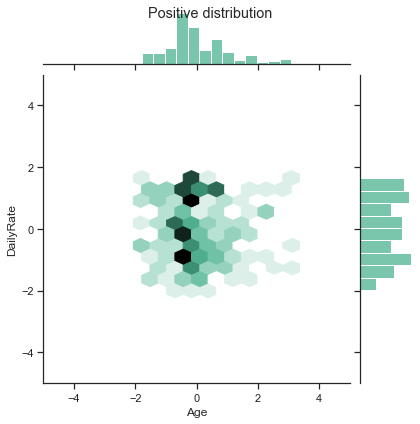

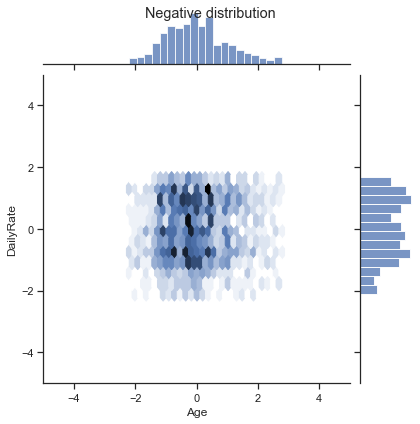

In [136]:
sns.set_theme(style="ticks")

sns.jointplot(x=pos_plot["Age"], y=pos_plot["DailyRate"],
              kind='hex', xlim=(-5,5), ylim=(-5,5),
              color="#4CB391")
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_plot["Age"], y=neg_plot["DailyRate"],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

## - Model building and data pre-processing 

In [137]:
train_df, val_df = train_test_split(train_data, test_size=0.5)

train_features = train_df.copy()
train_labels = train_features.pop('Attrition')
val_features = val_df.copy()
val_labels = val_features.pop("Attrition")

test_features = test_data.copy()


In [138]:
### Train data 

In [139]:
inputs = {}

for name, column in train_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs
 

{'id': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'id')>,
 'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'BusinessTravel': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'BusinessTravel')>,
 'DailyRate': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DailyRate')>,
 'Department': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Department')>,
 'DistanceFromHome': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DistanceFromHome')>,
 'Education': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Education')>,
 'EducationField': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'EducationField')>,
 'EmployeeCount': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EmployeeCount')>,
 'EnvironmentSatisfaction': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EnvironmentSatisfaction')>,
 'Gender': <KerasTensor: shape=(None, 1) dtype=

In [140]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(train_data[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs



<KerasTensor: shape=(None, 26) dtype=float32 (created by layer 'normalization_10')>

In [141]:
preprocessed_inputs = [all_numeric_inputs]


In [142]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
  
    lookup = layers.StringLookup(vocabulary=np.unique(train_features[name]))
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)
    

In [143]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)



In [144]:
train_features_dict = {name: np.array(value) 
                         for name, value in train_features.items()}


In [145]:
features_dict = {name:values[:] for name, values in train_features_dict.items()}
train_preprocessing(features_dict)


<tf.Tensor: shape=(838, 63), dtype=float32, numpy=
array([[-1.619, -0.24 , -0.063, ...,  0.   ,  1.   ,  0.   ],
       [ 0.428,  1.877, -0.323, ...,  0.   ,  1.   ,  0.   ],
       [-1.25 , -0.122,  0.204, ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 0.533, -1.533, -2.099, ...,  0.   ,  1.   ,  0.   ],
       [-1.246, -0.004,  0.62 , ...,  0.   ,  1.   ,  0.   ],
       [ 0.461,  0.936, -0.849, ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)>

In [146]:
## Val data 

In [147]:
inputs = {}

for name, column in train_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_data[list(numeric_inputs.keys())]))
all_numeric_inputs = norm(x)

all_numeric_inputs

preprocessed_inputs = [all_numeric_inputs]
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(train_features[name]))
    one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# Prepare validation data
val_features_dict = {name: np.array(value) for name, value in val_features.items()}
features_dict = {name: values[:] for name, values in val_features_dict.items()}

val_preprocessed = train_preprocessing(features_dict)

In [148]:
METRICS = [ tf.keras.metrics.TruePositives(name='tp'),
                           tf.keras.metrics.FalsePositives(name='fp'),
                           tf.keras.metrics.TrueNegatives(name='tn'),
                           tf.keras.metrics.FalseNegatives(name='fn'), 
                           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.AUC(name='auc'),
                           tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
          ]
                  
                

def nn_model(preprocessing_head, inputs, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    body = tf.keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
  ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[METRICS])
    return model

nn_model = nn_model(train_preprocessing, inputs, output_bias=None)

In [149]:
history = nn_model.fit(x=train_features_dict, y=train_labels,
                            validation_data=(val_features_dict, val_labels),
                            epochs=10,)
print(nn_model.summary())


Epoch 1/10
27/27 [==============================] - 3s 40ms/step - loss: 0.5583 - tp: 24.0000 - fp: 163.0000 - tn: 582.0000 - fn: 69.0000 - accuracy: 0.7232 - precision: 0.1283 - recall: 0.2581 - auc: 0.5676 - prc: 0.1247 - val_loss: 0.4151 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 732.0000 - val_fn: 107.0000 - val_accuracy: 0.8725 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6239 - val_prc: 0.1820
Epoch 2/10
27/27 [==============================] - 0s 8ms/step - loss: 0.4084 - tp: 0.0000e+00 - fp: 17.0000 - tn: 728.0000 - fn: 93.0000 - accuracy: 0.8687 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5507 - prc: 0.1110 - val_loss: 0.3605 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 732.0000 - val_fn: 107.0000 - val_accuracy: 0.8725 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6859 - val_prc: 0.2510
Epoch 3/10
27/27 [==============================] - 0s 11ms/step - loss: 0.3929 - tp: 2.0000 - fp: 6.0000 - tn: 739.0000 - fn

 NumCompaniesWorked (InputLayer  [(None, 1)]         0           []                               
 )                                                                                                
                                                                                                  
 Over18 (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 OverTime (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 PercentSalaryHike (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 PerformanceRating (InputLayer)  [(None, 1)]         0           []                               
          

In [150]:
nn_model.predict(train_features_dict)

27/27 [==============================] - 0s 3ms/step


array([[0.212],
       [0.   ],
       [0.004],
       [0.123],
       [0.002],
       [0.038],
       [0.028],
       [0.116],
       [0.311],
       [0.142],
       [0.111],
       [0.249],
       [0.02 ],
       [0.171],
       [0.025],
       [0.196],
       [0.009],
       [0.473],
       [0.016],
       [0.137],
       [0.262],
       [0.02 ],
       [0.011],
       [0.005],
       [0.032],
       [0.001],
       [0.01 ],
       [0.028],
       [0.063],
       [0.024],
       [0.159],
       [0.001],
       [0.046],
       [0.298],
       [0.193],
       [0.078],
       [0.002],
       [0.38 ],
       [0.029],
       [0.107],
       [0.021],
       [0.004],
       [0.058],
       [0.092],
       [0.006],
       [0.115],
       [0.004],
       [0.009],
       [0.078],
       [0.281],
       [0.001],
       [0.299],
       [0.03 ],
       [0.196],
       [0.065],
       [0.019],
       [0.134],
       [0.08 ],
       [0.132],
       [0.349],
       [0.11 ],
       [0.171],
       [

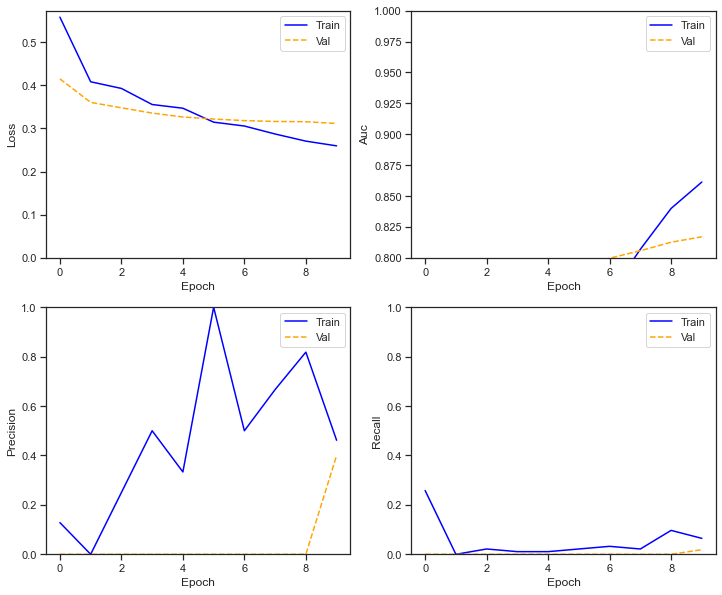

In [162]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    colors = ['blue', 'orange', 'green', 'red']  # Define colors for the plots

    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8, 1])
        else:
            plt.ylim([0, 1])

        plt.legend()

# Call the function with your 'history' object
plot_metrics(history)


In [163]:
## Test 

In [164]:
inputs = {}

for name, column in train_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_data[list(numeric_inputs.keys())]))
all_numeric_inputs = norm(x)

all_numeric_inputs

preprocessed_inputs = [all_numeric_inputs]
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(train_features[name]))
    one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# Prepare test data
test_features_dict = {name: np.array(value) for name, value in test_features.items()}
features_dict = {name: values[:] for name, values in test_features_dict.items()}

test_preprocessed = train_preprocessing(features_dict)

In [165]:
test_preprocessed

<tf.Tensor: shape=(1119, 63), dtype=float32, numpy=
array([[ 1.733, -2.003,  0.265, ...,  0.   ,  1.   ,  0.   ],
       [ 1.735,  1.054,  0.65 , ...,  0.   ,  0.   ,  1.   ],
       [ 1.737,  0.113, -1.971, ...,  0.   ,  0.   ,  1.   ],
       ...,
       [ 4.038,  0.701, -0.023, ...,  0.   ,  1.   ,  0.   ],
       [ 4.04 , -1.298,  1.539, ...,  0.   ,  1.   ,  0.   ],
       [ 4.042,  0.701,  0.911, ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)>

In [166]:
y_pred = nn_model.predict(test_features_dict)


35/35 [==============================] - 0s 3ms/step


In [167]:
#threshold for classification 
y_pred_binary =[]
for pred in y_pred:
    if pred > 0.11:              # threshold is at .11 because of the class imbalance 
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)

In [168]:
y_pred_binary

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [170]:
sub = pd.DataFrame(y_pred_binary) 
sub=pd.DataFrame(test_data['id'])
sub["Attrition"]= y_pred_binary
sub

id  Attrition
0     1677          0
1     1678          1
2     1679          0
3     1680          0
4     1681          1
...    ...        ...
1114  2791          0
1115  2792          0
1116  2793          0
1117  2794          0
1118  2795          0

[1119 rows x 2 columns]

In [171]:
sub.to_csv("predictions_1.csv",index=False)